In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])
        

In [11]:
# create a new column
df['Age_Years'] = df['Age']

In [12]:
# Drop the age column
df = df.drop('Age',axis = 1)

In [13]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,0,0,1,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,0,1,2,...,0,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,0,2,3,...,0,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,0,3,3,...,0,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,4,0,...,0,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,0,1465,2,...,0,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,0,1466,3,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,0,1467,1,...,0,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,0,1468,3,...,0,0,17,3,1,9,6,0,8,31


### Data Visualization 

<AxesSubplot:>

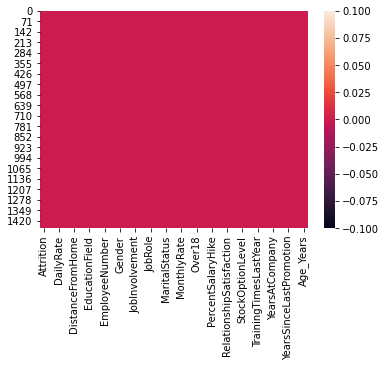

In [14]:
sns.heatmap(df.isnull())

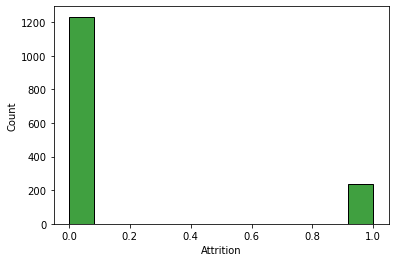

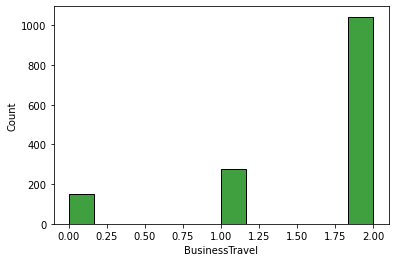

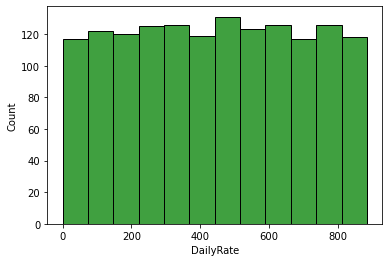

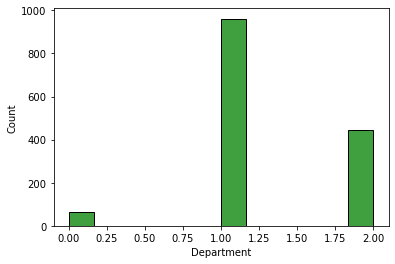

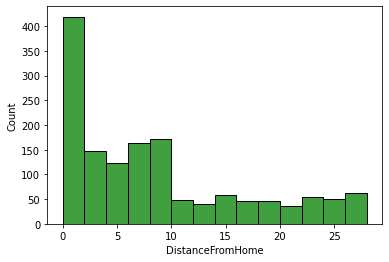

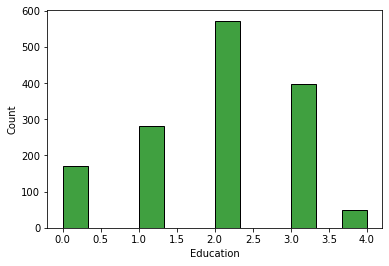

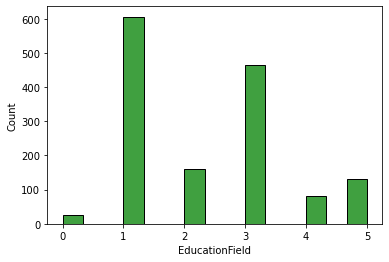

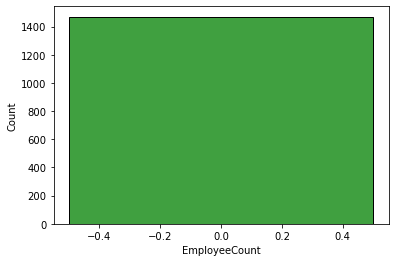

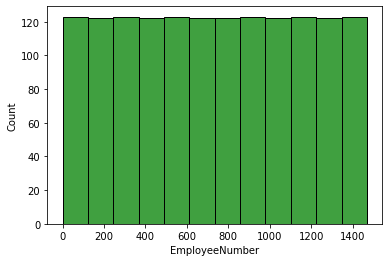

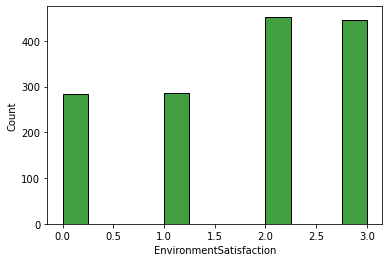

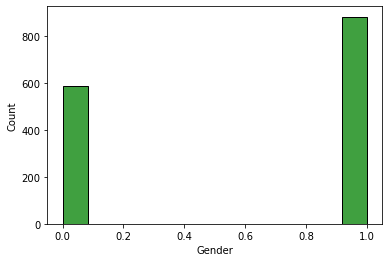

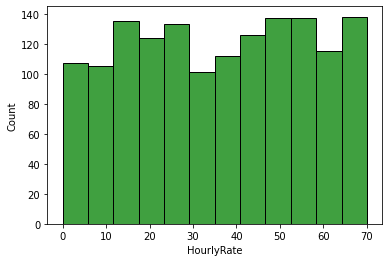

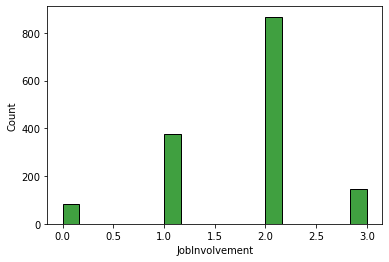

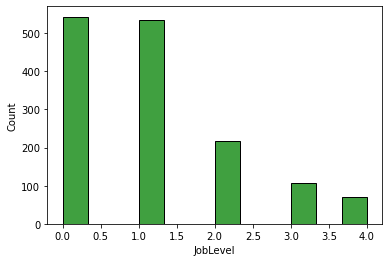

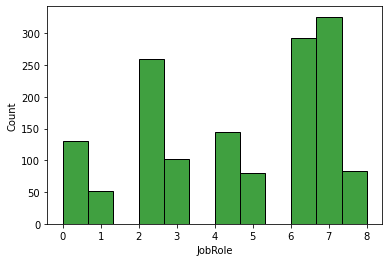

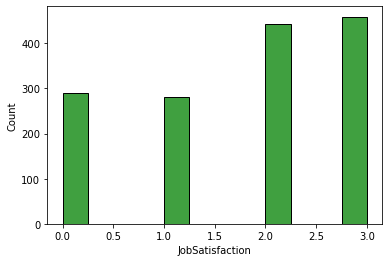

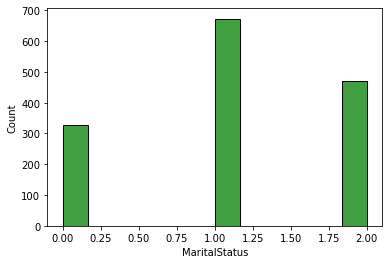

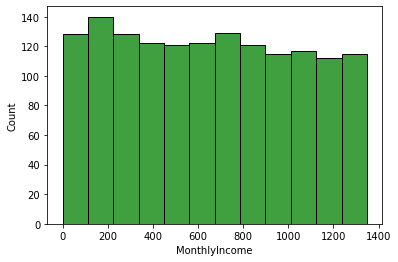

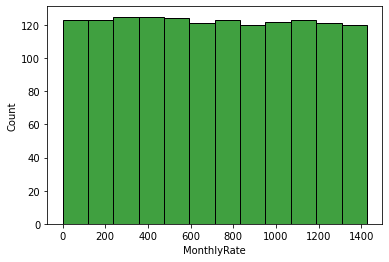

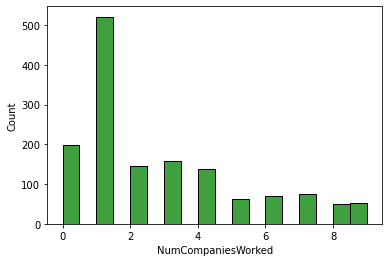

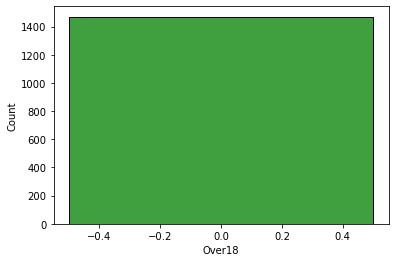

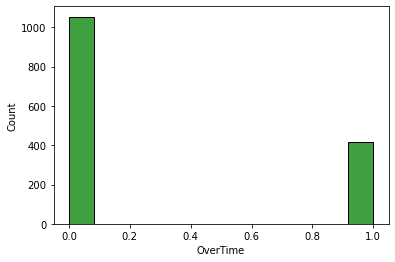

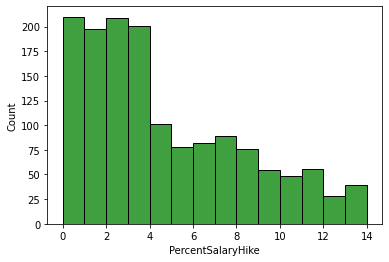

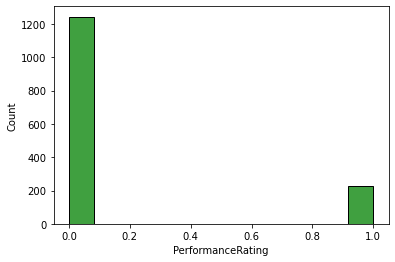

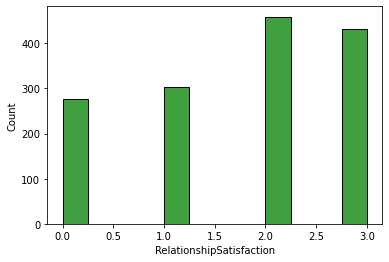

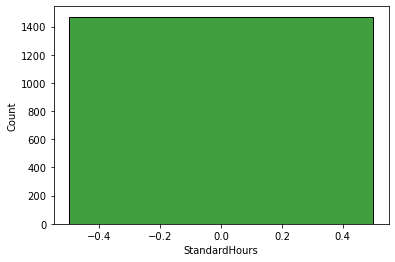

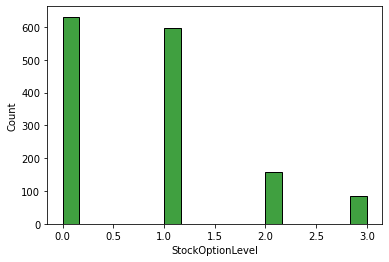

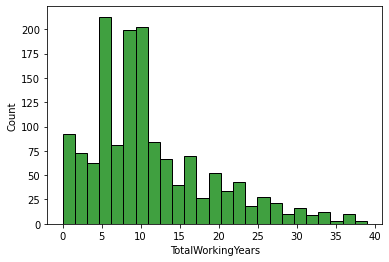

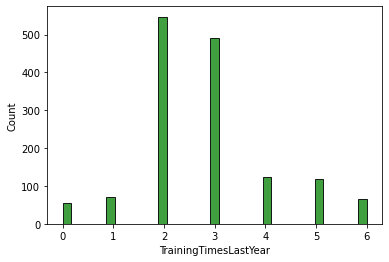

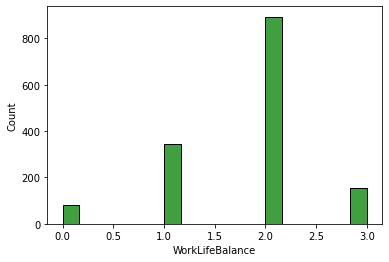

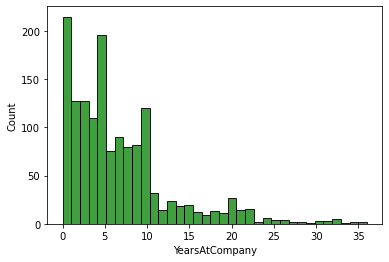

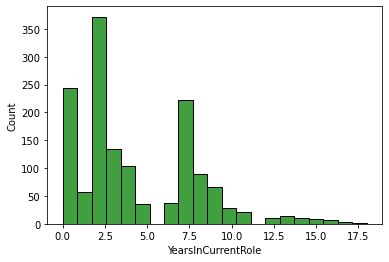

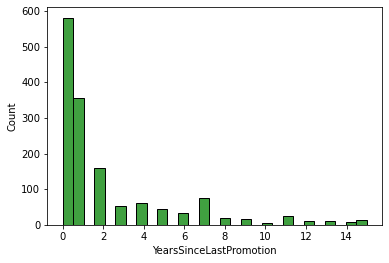

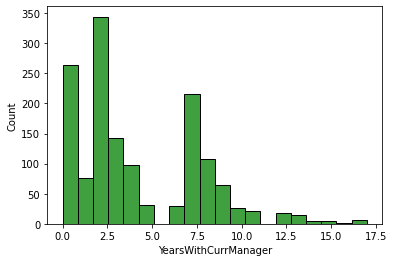

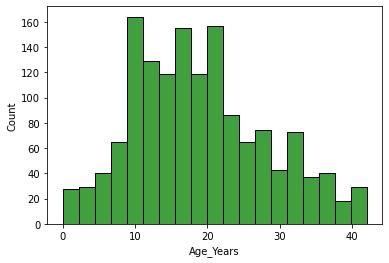

In [15]:
for i in df.columns:
    plt.figure()
    sns.histplot(df[i],color='green')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

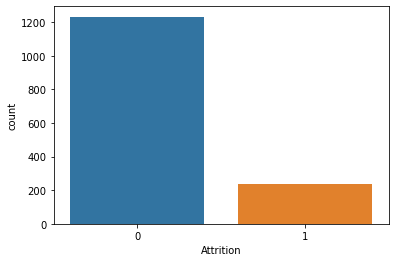

In [16]:
sns.countplot(df['Attrition'])

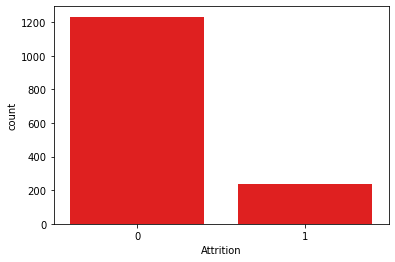

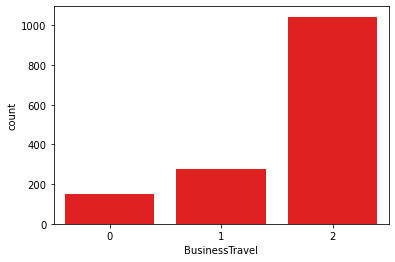

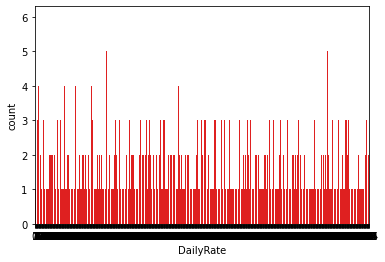

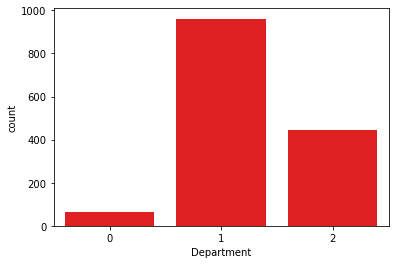

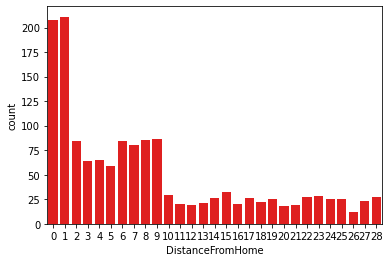

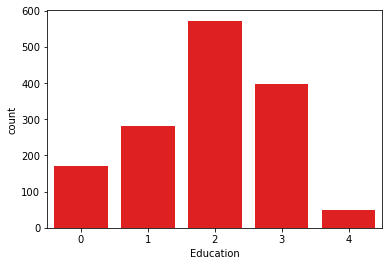

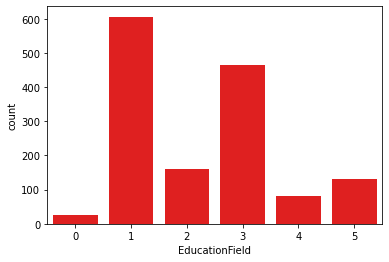

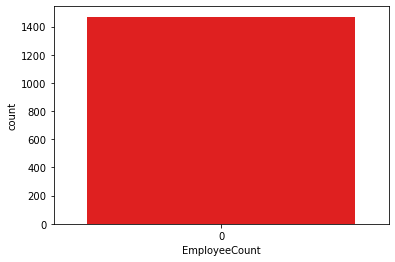

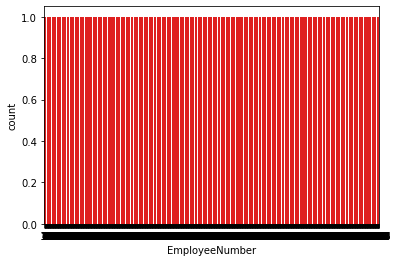

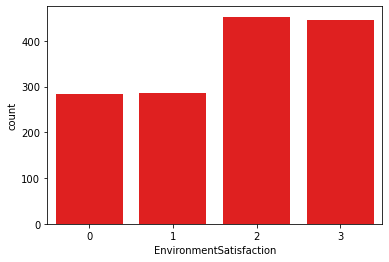

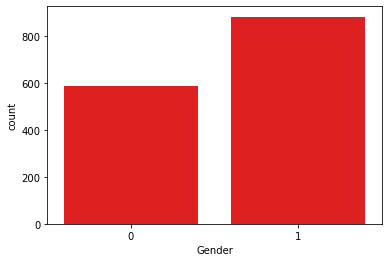

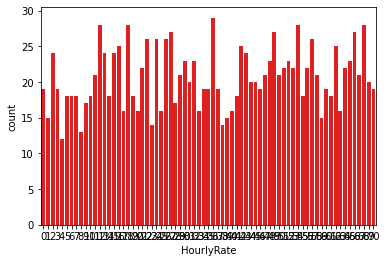

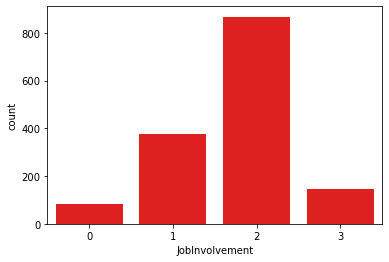

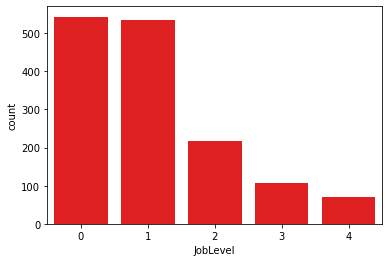

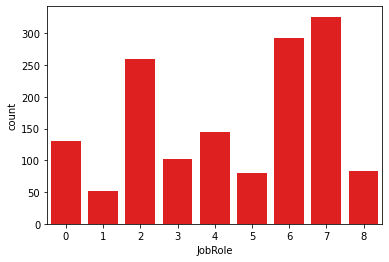

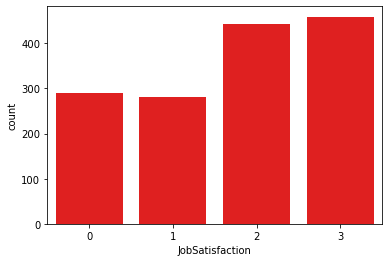

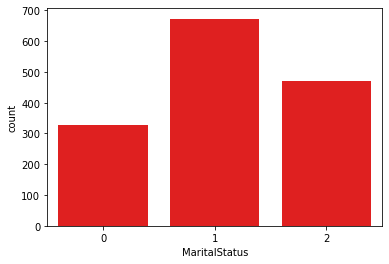

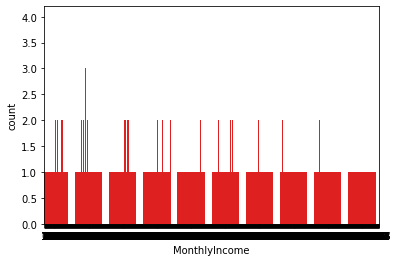

Error in callback <function flush_figures at 0x00000208604DE8B0> (for post_execute):


KeyboardInterrupt: 

In [17]:
for i in df.columns:
    plt.figure()
    sns.countplot(df[i],color='red')

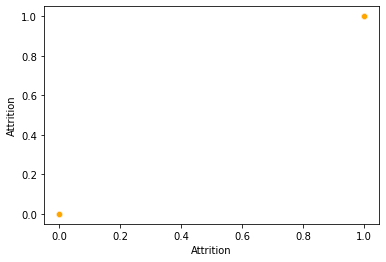

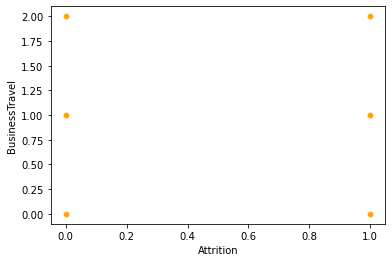

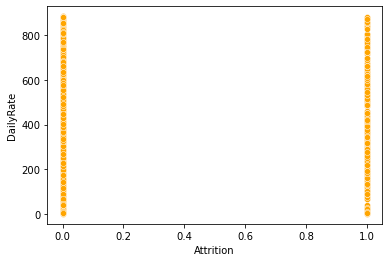

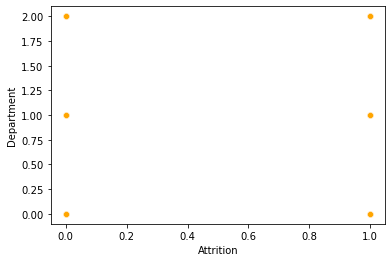

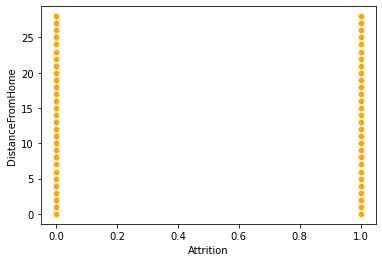

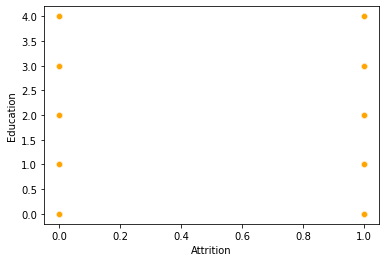

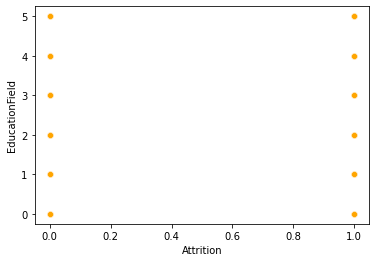

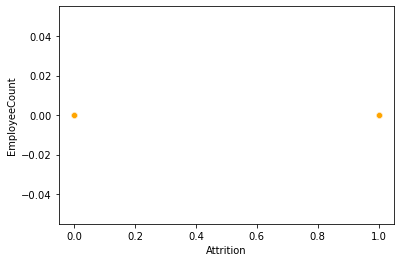

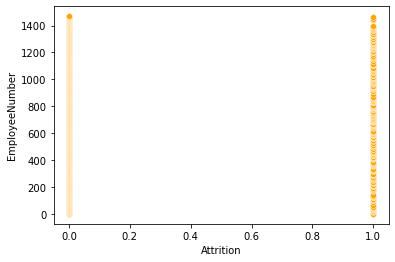

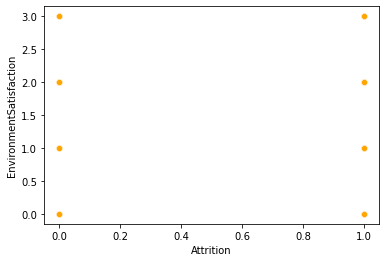

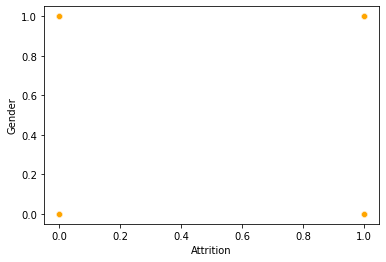

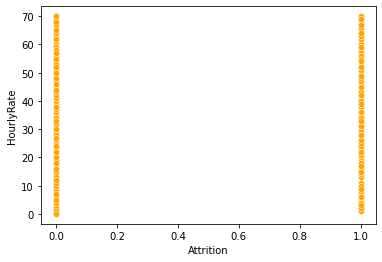

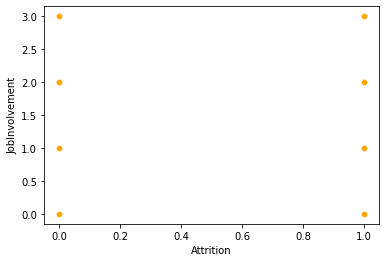

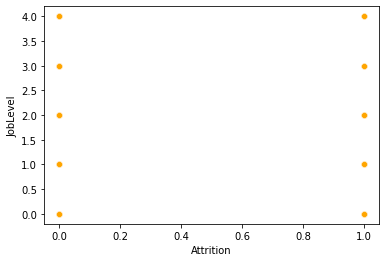

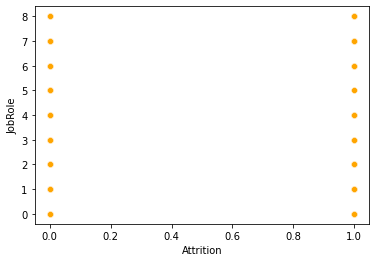

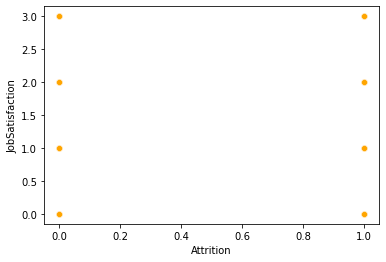

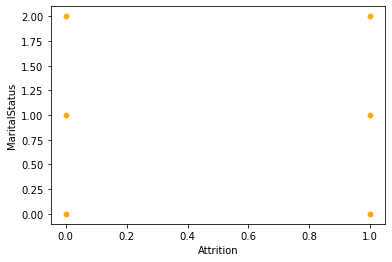

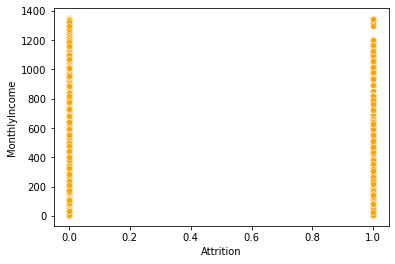

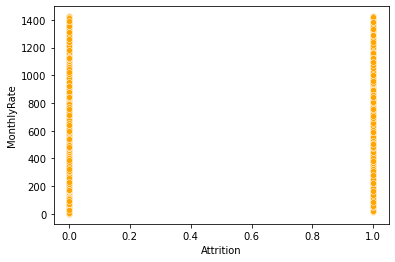

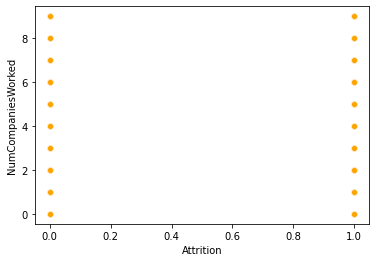

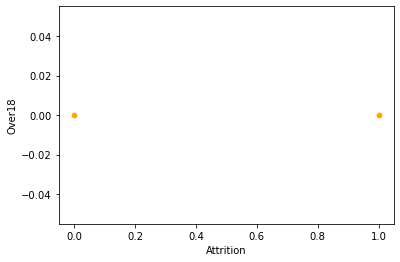

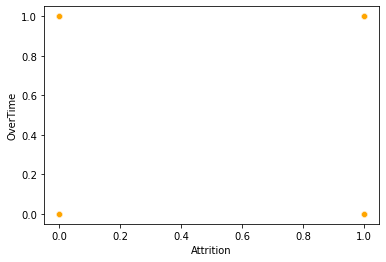

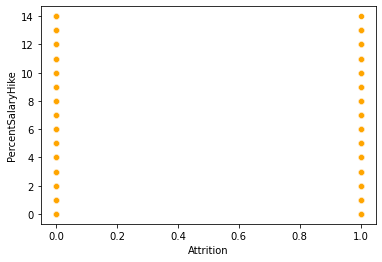

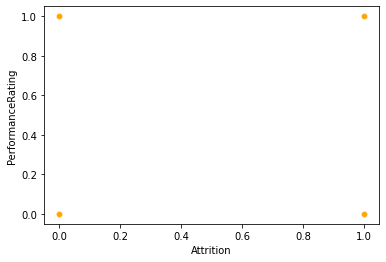

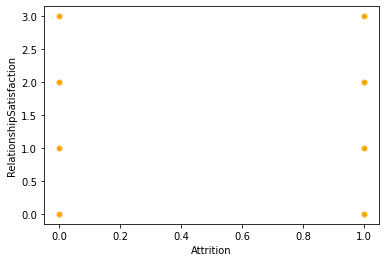

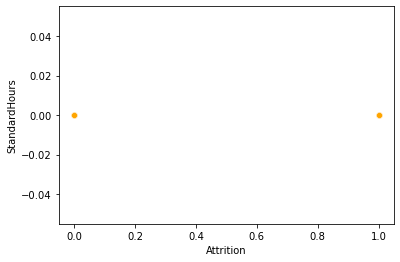

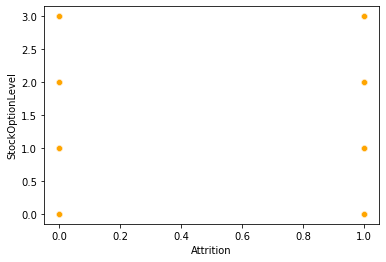

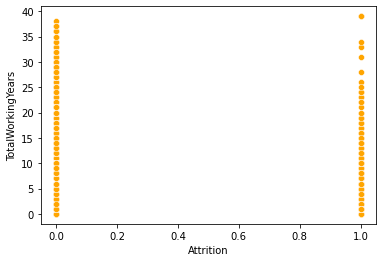

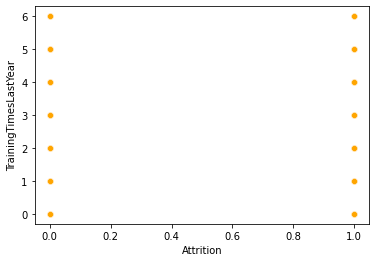

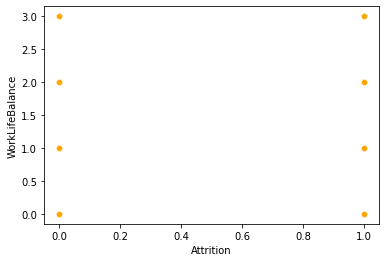

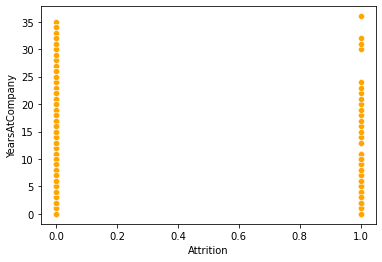

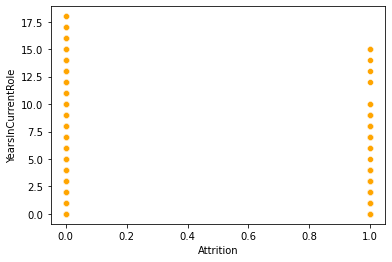

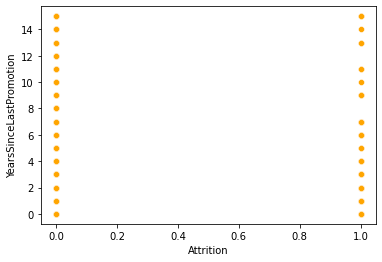

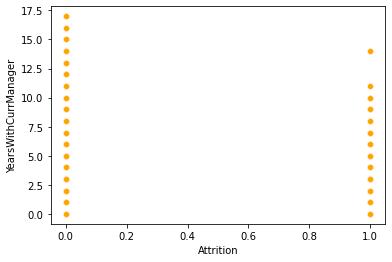

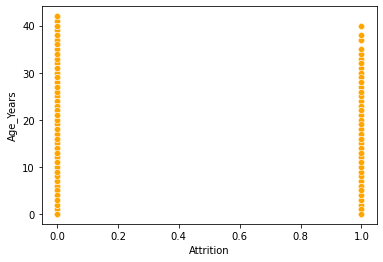

In [18]:
for i in df.columns:
    plt.figure()
    sns.scatterplot(x='Attrition',y=df[i],data=df,color='orange')

<AxesSubplot:xlabel='Age_Years', ylabel='HourlyRate'>

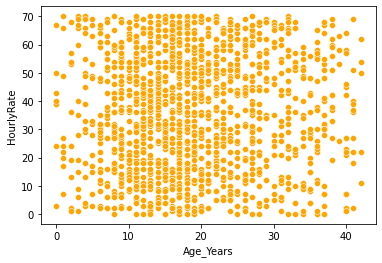

In [26]:
plt.figure()
sns.scatterplot(x='Age_Years',y='HourlyRate',data=df,color='orange')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='JobLevel'>

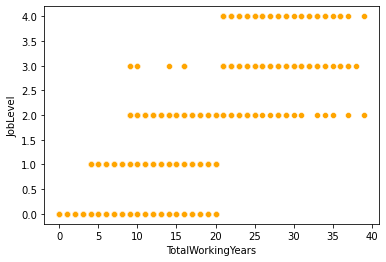

In [27]:
plt.figure()
sns.scatterplot(x='TotalWorkingYears',y='JobLevel',data=df,color='orange')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

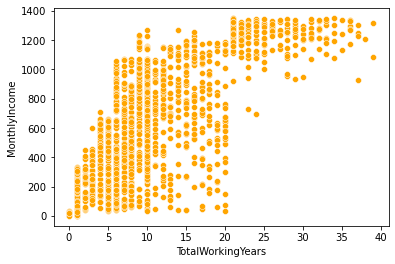

In [28]:
plt.figure()
sns.scatterplot(x='TotalWorkingYears',y='MonthlyIncome',data=df,color='orange')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobLevel'>

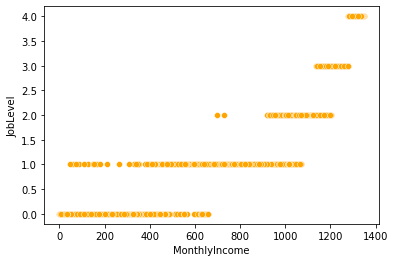

In [29]:
plt.figure()
sns.scatterplot(x='MonthlyIncome',y='JobLevel',data=df,color='orange')

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='PerformanceRating'>

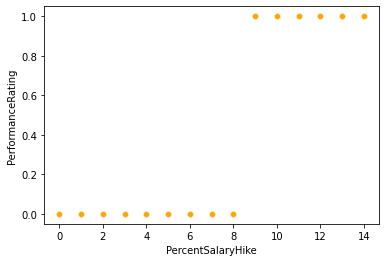

In [30]:
plt.figure()
sns.scatterplot(x='PercentSalaryHike',y='PerformanceRating',data=df,color='orange')

In [31]:
# This is the percent we just gussed no for Attrition
(1233-237)/1233

0.8077858880778589

<AxesSubplot:xlabel='Age_Years', ylabel='count'>

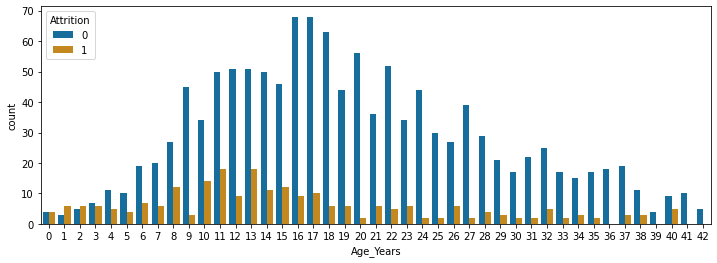

In [33]:
plt.subplots(figsize = (12,4))
sns.countplot(x = 'Age_Years',hue = 'Attrition', data = df,palette ='colorblind')

In [36]:
df['StandardHours'].unique()

array([0], dtype=int64)

In [37]:
df['EmployeeCount'].unique()

array([0], dtype=int64)

In [38]:
# Remove some columns
df = df.drop('Over18',axis = 1,)
df = df.drop('EmployeeNumber',axis = 1)
df = df.drop('StandardHours',axis = 1)
df = df.drop('EmployeeCount',axis = 1)

In [39]:
df.corr()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
Attrition,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,...,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199,-0.159205
BusinessTravel,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,...,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636,0.024751
DailyRate,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,0.018462,-0.011194,0.022916,...,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849,0.010557
Department,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,...,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282,-0.031882
DistanceFromHome,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,...,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406,-0.001686
Education,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,...,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065,0.208034
EducationField,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,...,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130,-0.040873
EnvironmentSatisfaction,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,...,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999,0.010146
Gender,0.029453,-0.032981,-0.011194,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,...,0.022868,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599,-0.036311
HourlyRate,-0.006846,0.026528,0.022916,-0.004144,0.031131,0.016775,-0.021941,-0.049857,-0.000478,1.000000,...,0.001330,0.050263,-0.002306,-0.008548,-0.004607,-0.020122,-0.024106,-0.026716,-0.020123,0.024287


<AxesSubplot:>

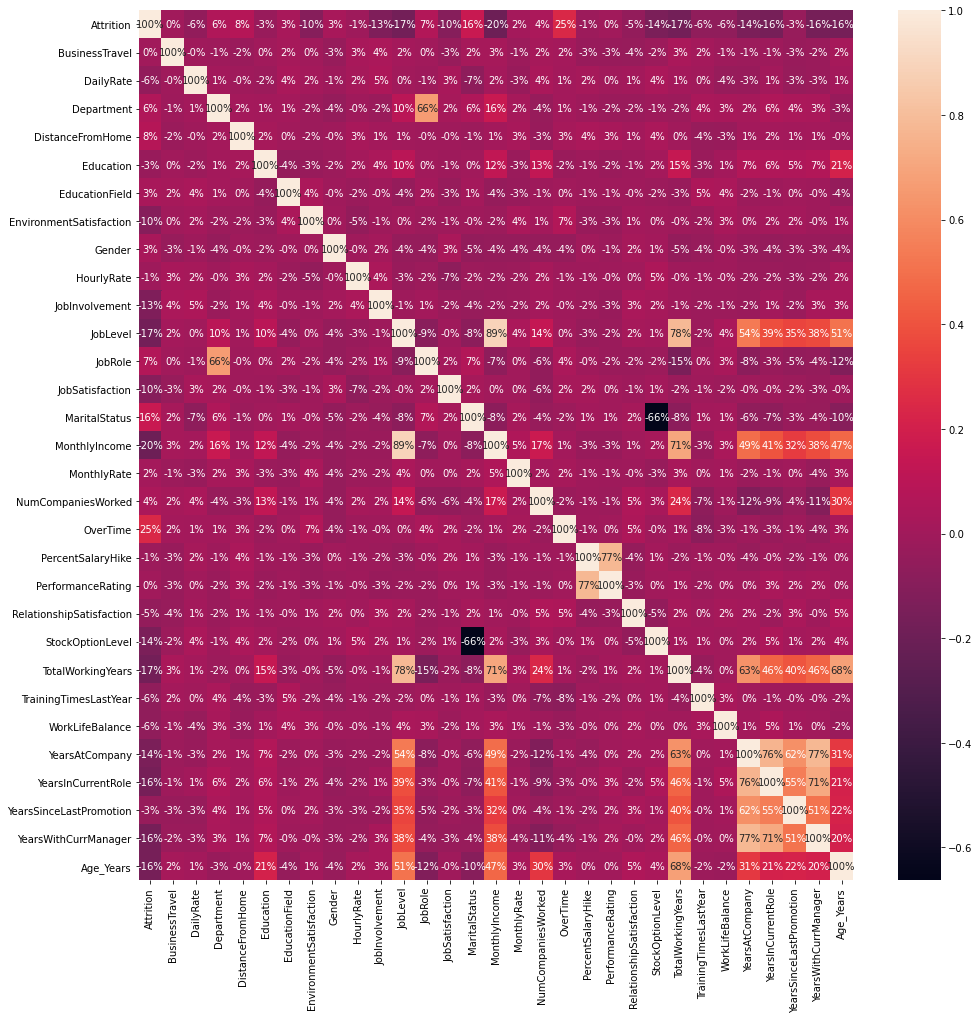

In [41]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(),annot = True,fmt = '.0%')

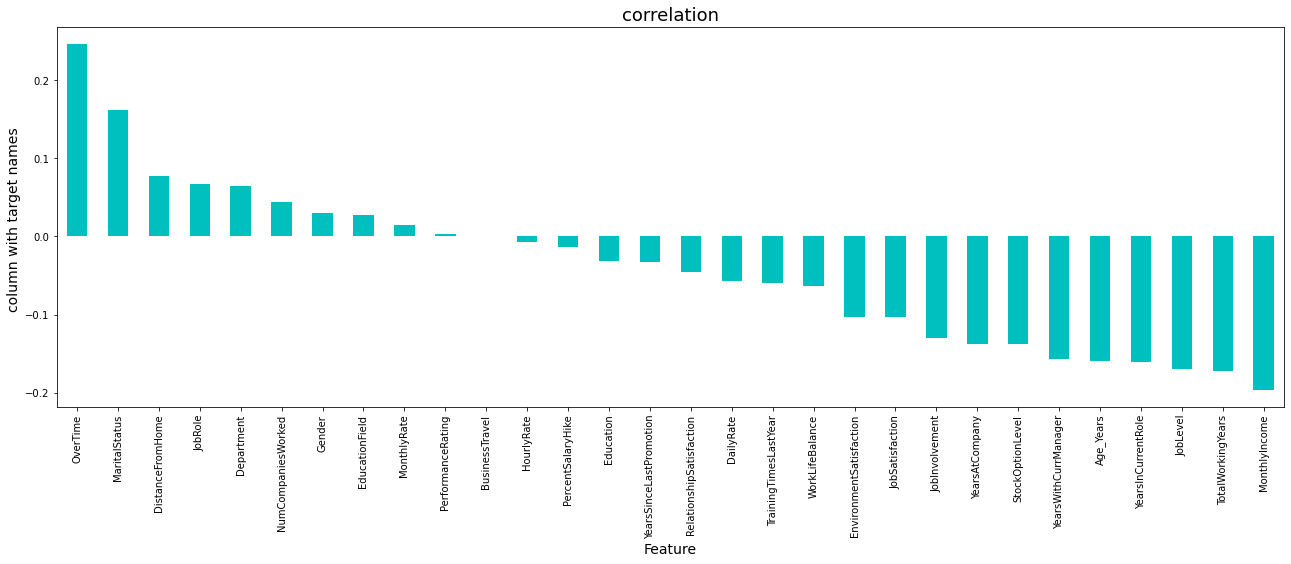

In [44]:
plt.figure(figsize = (22,7))
df.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind ='bar',color ='c')
plt.xlabel('Feature',fontsize = 14)
plt.ylabel("column with target names ",fontsize= 14)
plt.title("correlation",fontsize = 18)
plt.show()

### Plotting Outliers

In [45]:
df.skew()

Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.676650
Y

Attrition                      AxesSubplot(0.125,0.125;0.0209459x0.755)
BusinessTravel              AxesSubplot(0.150135,0.125;0.0209459x0.755)
DailyRate                    AxesSubplot(0.17527,0.125;0.0209459x0.755)
Department                  AxesSubplot(0.200405,0.125;0.0209459x0.755)
DistanceFromHome            AxesSubplot(0.225541,0.125;0.0209459x0.755)
Education                   AxesSubplot(0.250676,0.125;0.0209459x0.755)
EducationField              AxesSubplot(0.275811,0.125;0.0209459x0.755)
EnvironmentSatisfaction     AxesSubplot(0.300946,0.125;0.0209459x0.755)
Gender                      AxesSubplot(0.326081,0.125;0.0209459x0.755)
HourlyRate                  AxesSubplot(0.351216,0.125;0.0209459x0.755)
JobInvolvement              AxesSubplot(0.376351,0.125;0.0209459x0.755)
JobLevel                    AxesSubplot(0.401486,0.125;0.0209459x0.755)
JobRole                     AxesSubplot(0.426622,0.125;0.0209459x0.755)
JobSatisfaction             AxesSubplot(0.451757,0.125;0.0209459

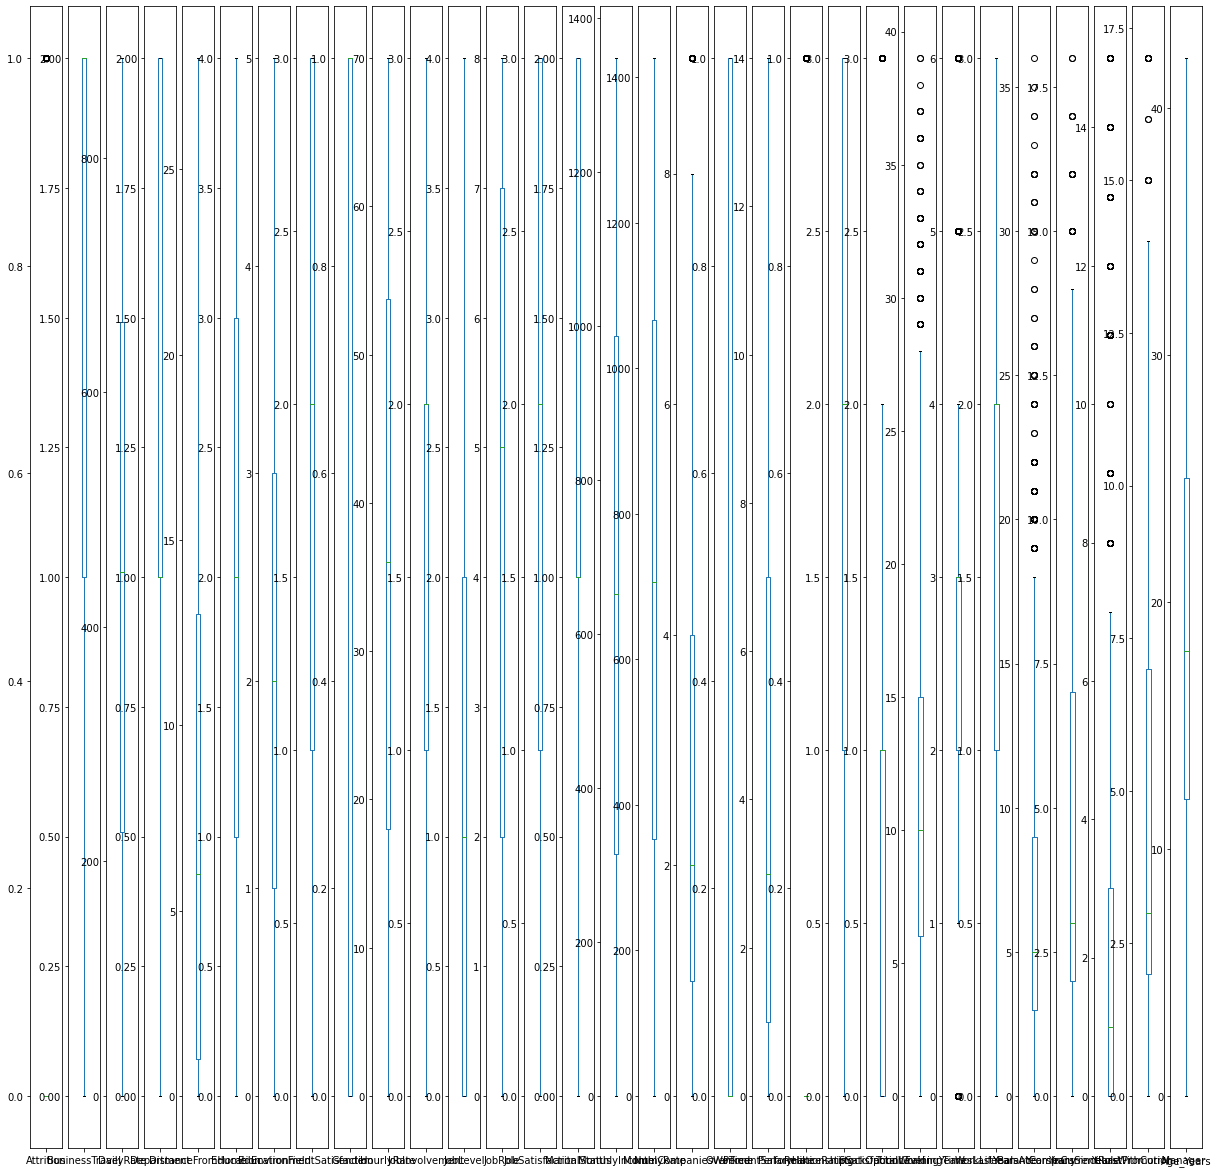

In [50]:
df.plot(kind = 'box',subplots = True,figsize =(21,21))

In [51]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z

array([[2.28090588, 0.59004834, 0.71391447, ..., 0.67914568, 0.24583399,
        0.4463504 ],
       [0.4384223 , 0.91319439, 1.30244563, ..., 0.36871529, 0.80654148,
        1.32236521],
       [2.28090588, 0.59004834, 1.42812421, ..., 0.67914568, 1.15593471,
        0.008343  ],
       ...,
       [0.4384223 , 0.59004834, 1.59444298, ..., 0.67914568, 0.31487349,
        1.08667552],
       [0.4384223 , 0.91319439, 0.53634851, ..., 0.67914568, 1.08689522,
        1.32236521],
       [0.4384223 , 0.59004834, 0.42250766, ..., 0.36871529, 0.59522723,
        0.32016256]])

In [52]:
thresold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([29, 28, 26, 28, 27, 28, 23, 23, 26, 28, 27, 28, 29, 23, 26, 28, 29,
       28, 23, 29, 26, 27, 28, 27, 29, 26, 28, 23, 26, 27, 28, 28, 29, 23,
       26, 26, 28, 28, 23, 27, 26, 26, 28, 26, 29, 28, 26, 23, 26, 28, 29,
       23, 29, 26, 28, 

In [54]:
df_new = df[(z<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


### Percentage of loss

In [55]:
loss = (1470-1387)/1470*100
loss

5.646258503401361

In [56]:
# Split the data 
x = df_new.iloc[:,1:df.shape[1]].values
y = df_new.iloc[:,0].values

In [57]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method = "yeo-johnson")

In [58]:
x

array([[ 0.63872976,  0.72632912,  1.37988121, ..., -1.07353381,
         0.58217664,  0.59475711],
       [-1.38077628, -1.34801814, -0.4734996 , ...,  0.19316755,
         1.01807316,  1.36633824],
       [ 0.63872976,  1.32006836, -0.4734996 , ..., -1.07353381,
        -1.52842596,  0.1727712 ],
       ...,
       [ 0.63872976, -1.79991586, -0.4734996 , ..., -1.07353381,
         0.01867962, -1.05707145],
       [-1.38077628,  0.57176248,  1.37988121, ..., -1.07353381,
         1.20578193,  1.36633824],
       [ 0.63872976, -0.33110751, -0.4734996 , ...,  0.19316755,
        -0.3478709 , -0.16498893]])

In [59]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[1.        , 0.77485467, 1.        , ..., 0.        , 0.58377965,
        0.66278521],
       [0.18602295, 0.2196299 , 0.53093724, ..., 0.43975871, 0.70434594,
        0.8138674 ],
       [1.        , 0.93377634, 0.53093724, ..., 0.        , 0.        ,
        0.58015675],
       ...,
       [1.        , 0.09867387, 0.53093724, ..., 0.        , 0.42791985,
        0.33934302],
       [0.18602295, 0.73348299, 1.        , ..., 0.        , 0.75626502,
        0.8138674 ],
       [1.        , 0.49181864, 0.53093724, ..., 0.43975871, 0.32653424,
        0.51402042]])

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
smt=SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [65]:
x_train

array([[0.        , 0.56627186, 0.53093724, ..., 0.        , 0.        ,
        0.53652043],
       [1.        , 0.11369276, 0.53093724, ..., 0.        , 0.        ,
        0.60135599],
       [1.        , 0.03417541, 1.        , ..., 0.        , 0.42791985,
        0.46746488],
       ...,
       [1.        , 0.56791731, 1.        , ..., 0.87924085, 0.70434594,
        0.45700671],
       [1.        , 0.66851315, 0.53093724, ..., 0.        , 0.20372273,
        0.41364686],
       [1.        , 0.34001167, 0.53093724, ..., 0.70268514, 0.6639153 ,
        0.45332769]])

In [66]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [98]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.naive_bayes import MultinomialNB

In [102]:
mnb = MultinomialNB()
for i in range(1,15000):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    pred_train = mnb.predict(x_train)
    pred_test = mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state",i,"The model performs very well")
        print("At Random state:-",i)
        print("Training Score is :-",accuracy_score(y_train,pred_train)*100)
        print("Testing Score is :-",accuracy_score(y_test,pred_test)*100)
        

At Random state 71 The model performs very well
At Random state:- 71
Training Score is :- 83.49864743011722
Testing Score is :- 83.45323741007195
At Random state 79 The model performs very well
At Random state:- 79
Training Score is :- 83.76916140667268
Testing Score is :- 83.81294964028777
At Random state 84 The model performs very well
At Random state:- 84
Training Score is :- 83.76916140667268
Testing Score is :- 83.81294964028777
At Random state 127 The model performs very well
At Random state:- 127
Training Score is :- 83.76916140667268
Testing Score is :- 83.81294964028777
At Random state 212 The model performs very well
At Random state:- 212
Training Score is :- 83.49864743011722
Testing Score is :- 83.45323741007195
At Random state 231 The model performs very well
At Random state:- 231
Training Score is :- 84.2200180342651
Testing Score is :- 84.17266187050359
At Random state 258 The model performs very well
At Random state:- 258
Training Score is :- 83.49864743011722
Testing S

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=995,test_size=0.20)

In [68]:
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LogisticRegression()
0.8085351787773933


In [69]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 0]
actual score: [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0

In [70]:
print("Accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy_score: 0.7262247838616714
[[208  83]
 [ 12  44]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       291
           1       0.35      0.79      0.48        56

    accuracy                           0.73       347
   macro avg       0.65      0.75      0.65       347
weighted avg       0.85      0.73      0.76       347



In [71]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.7998737625406951


In [72]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [104]:
dtc = DecisionTreeClassifier()
for i in range(1,12000):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    predict_train = mnb.predict(x_train)
    predict_test = mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state",i,"The model performs very well")
        print("At Random state:-",i)
        print("Training Score is :-",accuracy_score(y_train,pred_train)*100)
        print("Testing Score is :-",accuracy_score(y_test,pred_test)*100)
        

At Random state 26 The model performs very well
At Random state:- 26
Training Score is :- 83.13796212804328
Testing Score is :- 83.09352517985612
At Random state 82 The model performs very well
At Random state:- 82
Training Score is :- 83.13796212804328
Testing Score is :- 83.09352517985612
At Random state 168 The model performs very well
At Random state:- 168
Training Score is :- 83.13796212804328
Testing Score is :- 83.09352517985612
At Random state 187 The model performs very well
At Random state:- 187
Training Score is :- 83.13796212804328
Testing Score is :- 83.09352517985612
At Random state 188 The model performs very well
At Random state:- 188
Training Score is :- 83.13796212804328
Testing Score is :- 83.09352517985612
At Random state 200 The model performs very well
At Random state:- 200
Training Score is :- 83.13796212804328
Testing Score is :- 83.09352517985612
At Random state 223 The model performs very well
At Random state:- 223
Training Score is :- 83.13796212804328
Testin

In [74]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [75]:
fun(svc)

Accuracy:: 0.7752161383285303
confusion matrix
 [[236  55]
 [ 23  33]]
classification report
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       291
           1       0.38      0.59      0.46        56

    accuracy                           0.78       347
   macro avg       0.64      0.70      0.66       347
weighted avg       0.82      0.78      0.79       347

F1 score 0.7752161383285302


In [76]:
fun(dtc)

Accuracy:: 0.7550432276657061
confusion matrix
 [[238  53]
 [ 32  24]]
classification report
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       291
           1       0.31      0.43      0.36        56

    accuracy                           0.76       347
   macro avg       0.60      0.62      0.60       347
weighted avg       0.79      0.76      0.77       347

F1 score 0.7550432276657061


In [77]:
fun(knn)

Accuracy:: 0.5936599423631124
confusion matrix
 [[167 124]
 [ 17  39]]
classification report
               precision    recall  f1-score   support

           0       0.91      0.57      0.70       291
           1       0.24      0.70      0.36        56

    accuracy                           0.59       347
   macro avg       0.57      0.64      0.53       347
weighted avg       0.80      0.59      0.65       347

F1 score 0.5936599423631124


In [79]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"splitter":['best','random'],"max_features":['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(dtc,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
0.7880450873957873


In [80]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [110]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [111]:
fun(rf)

Accuracy:: 0.8453237410071942
confusion matrix
 [[230   3]
 [ 40   5]]
classification report
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       233
           1       0.62      0.11      0.19        45

    accuracy                           0.85       278
   macro avg       0.74      0.55      0.55       278
weighted avg       0.82      0.85      0.80       278

F1 score 0.8453237410071942


In [85]:
fun(ad)

Accuracy:: 0.8126801152737753
confusion matrix
 [[248  43]
 [ 22  34]]
classification report
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       291
           1       0.44      0.61      0.51        56

    accuracy                           0.81       347
   macro avg       0.68      0.73      0.70       347
weighted avg       0.84      0.81      0.82       347

F1 score 0.8126801152737753


In [86]:
#cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [88]:
for i in range(2,10):
    score=cross_val_score(lm,x,y,cv=i)
    print('At Value of',i,score.mean())

At Value of 2 0.8644535099866513
At Value of 3 0.866617423852845
At Value of 4 0.8666209958188269
At Value of 5 0.872391761680908
At Value of 6 0.869498556998557
At Value of 7 0.8687702582174944
At Value of 8 0.8680652448342303
At Value of 9 0.8709351580319322


In [90]:
score=cross_val_score(lm,x,y,cv=10)
score.mean()

0.8724168491293922

In [92]:
score=cross_val_score(dtc,x,y,cv=10)
score.mean()

0.790214784693984

In [94]:
score=cross_val_score(svc,x,y,cv=10)
score.mean()

0.863033051819414

In [95]:
score=cross_val_score(knn,x,y,cv=10)
score.mean()

0.844974455218434

In [96]:
score=cross_val_score(rf,x,y,cv=10)
score.mean()

0.8522051923678449

In [97]:
score=cross_val_score(ad,x,y,cv=10)
score.mean()

0.8745803357314148

In [105]:
import pickle
filename="Hr_Employee_Attrition.pkl"
pickle.dump(rf,open(filename,'wb'))

In [106]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_HR=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [107]:
df_HR

,orginal,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
273,1,1
274,0,0
275,0,0
276,0,0
